Импорт библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Загрузка преобработанного датасета и просмотр основной его информации

In [3]:
df = pd.read_csv('pretty_car_price_dataset.csv', encoding='utf8')
print(df.head(5), "\n")
df.info()

        Бренд  Модель   Год  Объём двигателя Тип топлива     Трансмиссия  \
0         Kia     Rio  2020              4.2      Diesel          Manual   
1   Chevrolet  Malibu  2012              2.0      Hybrid       Automatic   
2    Mercedes     GLA  2020              4.2      Diesel       Automatic   
3        Audi      Q5  2023              2.0    Electric          Manual   
4  Volkswagen    Golf  2003              2.6      Hybrid  Semi-Automatic   

   Пробег  Количество дверей  Количество владельцев  Стоимость  
0  289944                  3                      5       8501  
1    5356                  2                      3      12092  
2  231440                  4                      2      11171  
3  160971                  2                      1      11780  
4  286618                  3                      3       2867   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 10 columns):
 #   Column                 Non-Null Count

Описательные характеристики числовых столбцов:
1) количество
2) среднее значение
3) стандартное отклонение
4) диапазон и квартили

In [4]:
print(df.describe())

                Год  Объём двигателя         Пробег  Количество дверей  \
count  10002.000000      10002.00000   10002.000000       10002.000000   
mean    2011.543691          3.00071  149238.696661           3.497101   
std        6.898926          1.14926   86323.344895           1.110188   
min     2000.000000          1.00000      25.000000           2.000000   
25%     2006.000000          2.00000   74619.750000           3.000000   
50%     2012.000000          3.00000  149587.000000           3.000000   
75%     2017.000000          4.00000  223596.500000           4.000000   
max     2023.000000          5.00000  299947.000000           5.000000   

       Количество владельцев     Стоимость  
count           10002.000000  10002.000000  
mean                2.991102   8852.953309  
std                 1.422610   3112.286221  
min                 1.000000   2000.000000  
25%                 2.000000   6646.500000  
50%                 3.000000   8858.500000  
75%               

Визуализация распределения числовых переменных

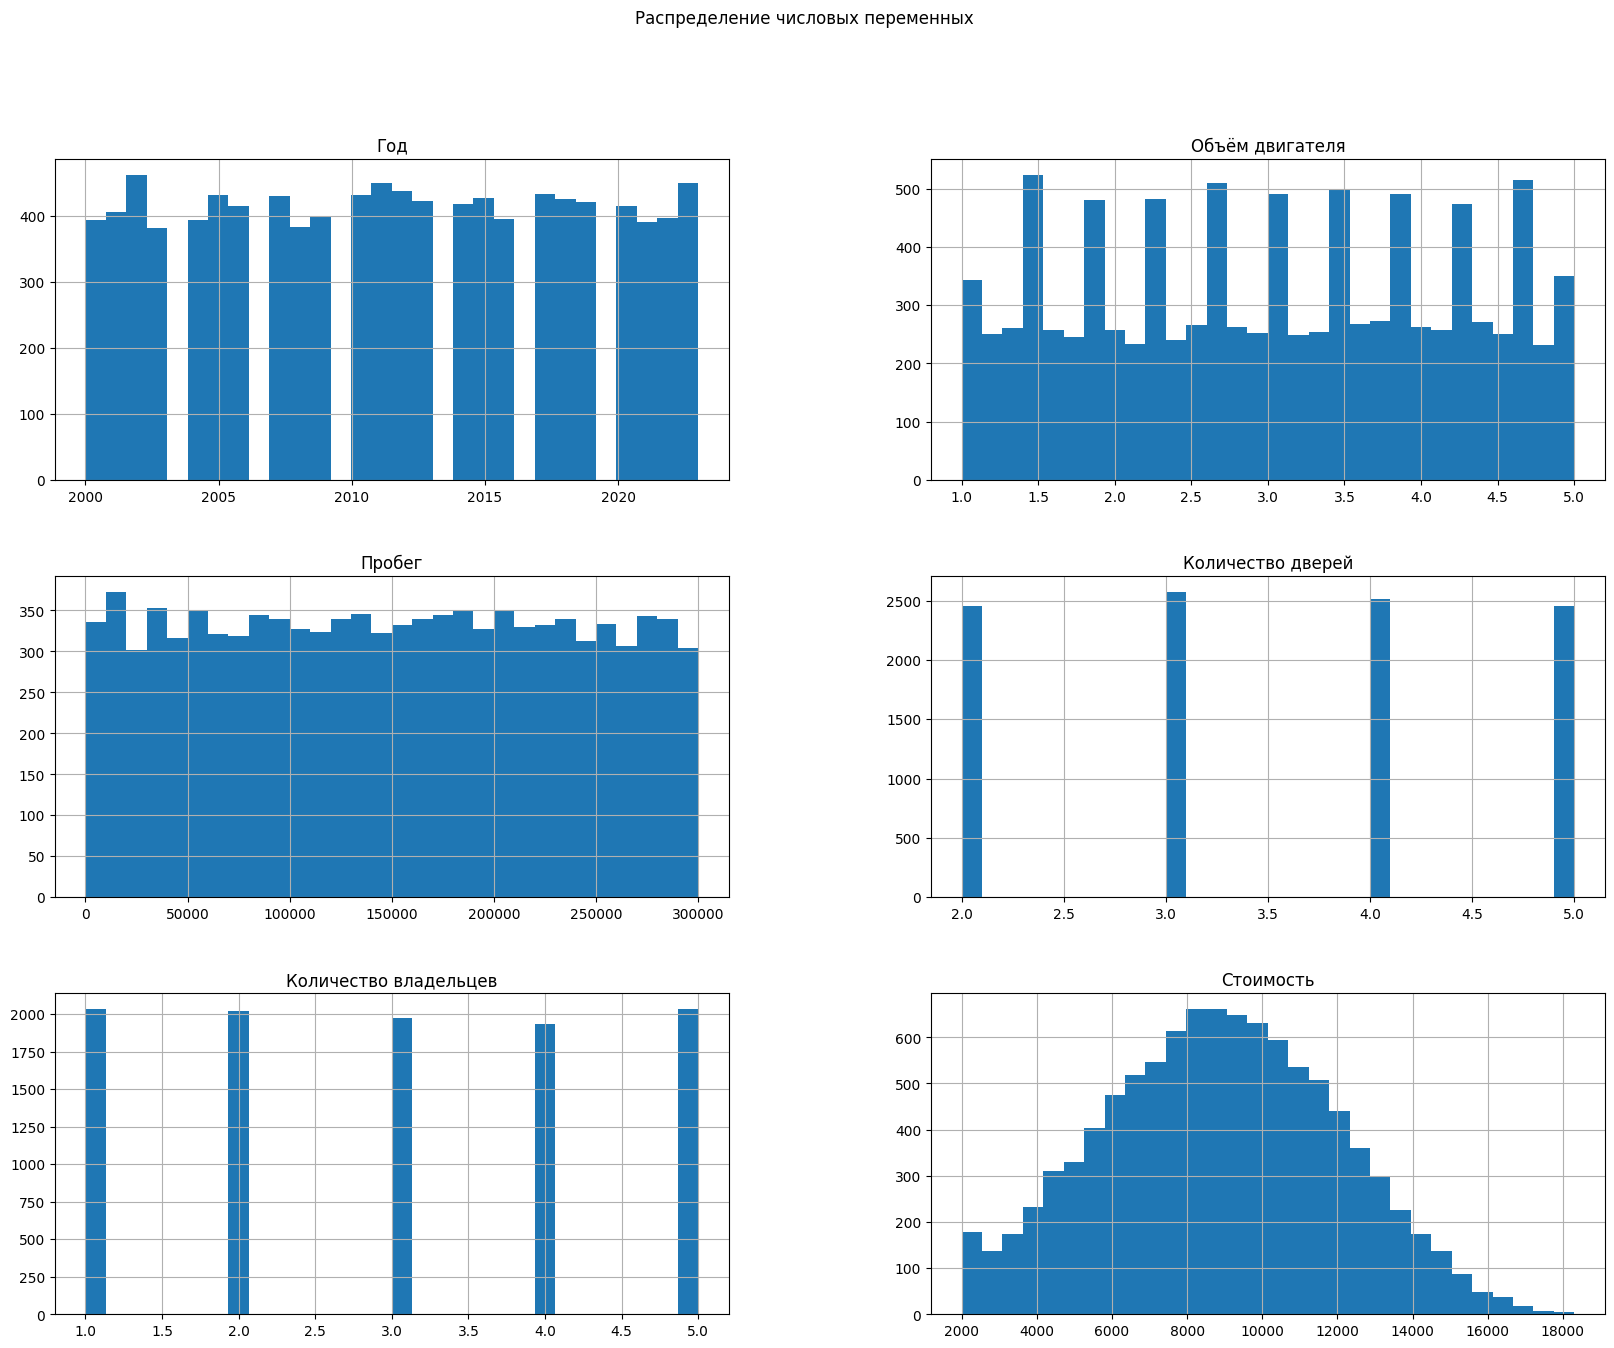

In [5]:
df.hist(bins=30, figsize=(20,15))
plt.suptitle('Распределение числовых переменных')
plt.show()

Корреляция между стоимостью и пробегом

In [6]:
fig = px.histogram(
    df, x='Пробег', y='Стоимость', nbins=20, 
    title='Гистограмма стоимости автомобиля в зависимости от пробега',
    labels={'Пробег': 'Пробег (км)', 'Стоимость': 'Стоимость (USD)'},
    opacity=0.7)
fig.update_layout(
    xaxis_title='Пробег (км)', yaxis_title='Стоимость (USD)',
    bargap=0.1, width=800, height=600)
fig.show()

Корреляция между числовыми переменными

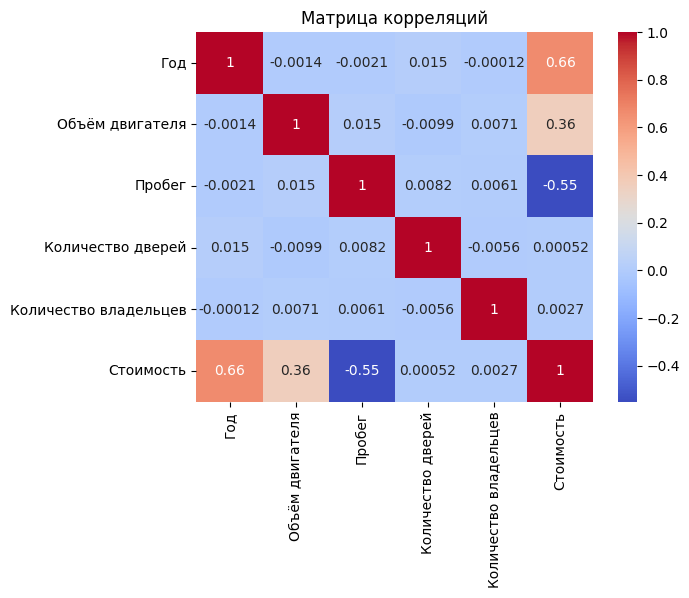

In [7]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

Вбросы и аномалии

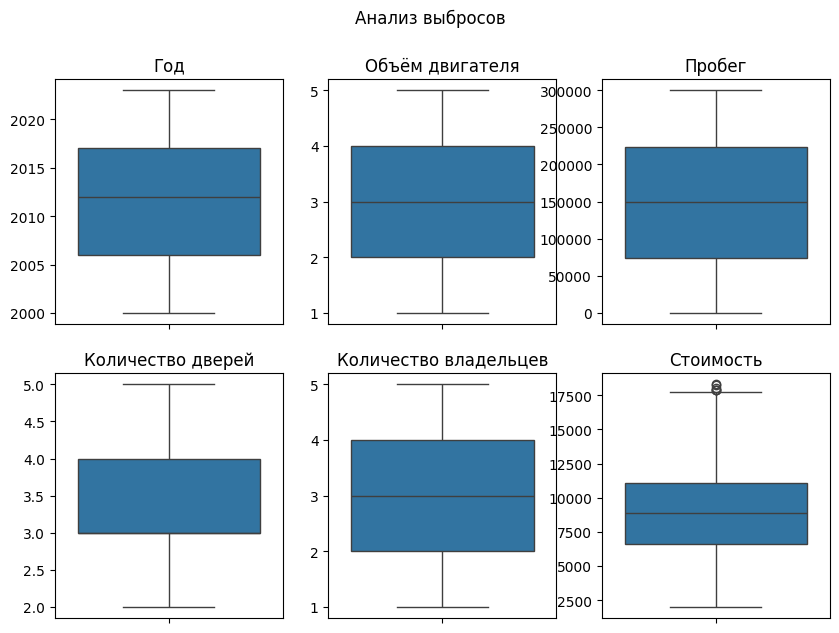

In [8]:
plt.figure(figsize=(10, 7))
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.xlabel("")
    plt.ylabel("")
    plt.title(column)
plt.suptitle('Анализ выбросов')
plt.show()

Категориальные переменные

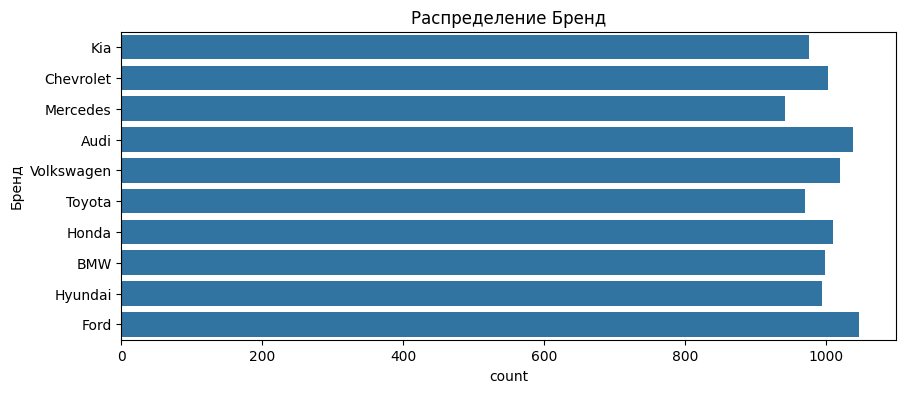

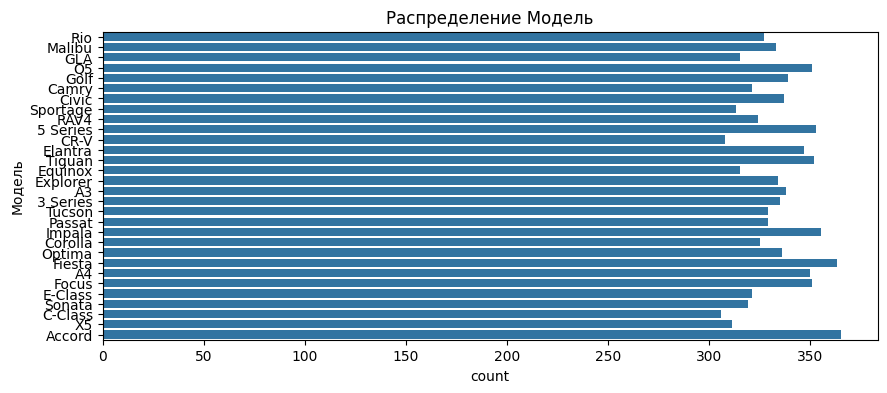

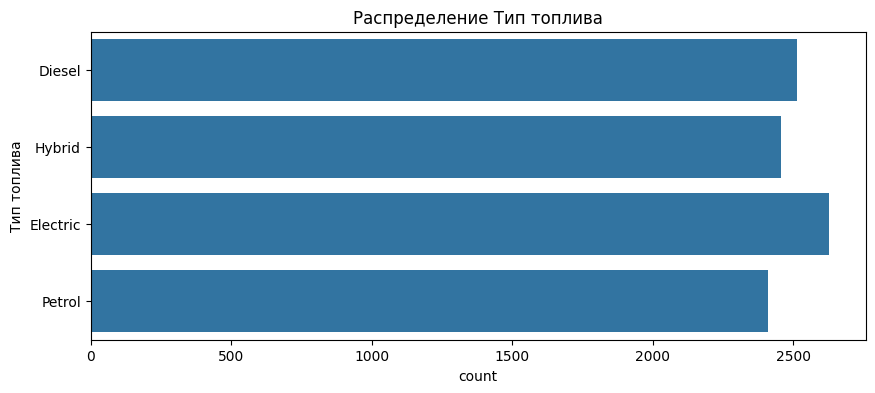

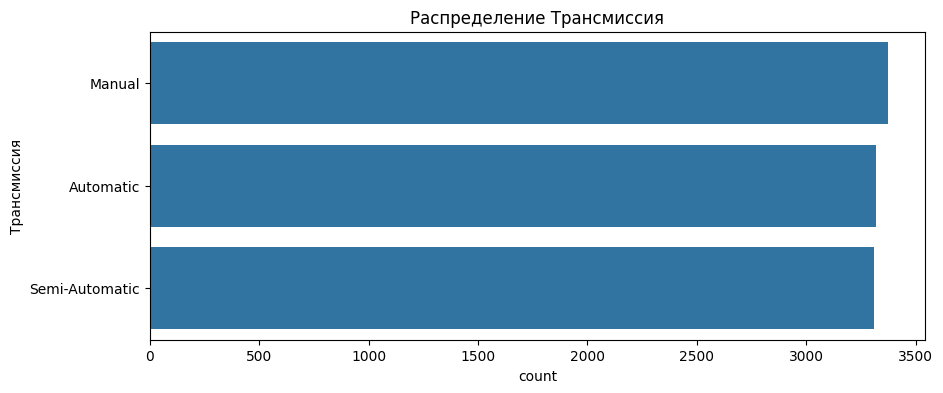

Текстовый анализ категориальных переменных:
Бренд
Ford          1048
Audi          1039
Volkswagen    1020
Honda         1010
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64
Модель
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Q5          351
Focus       351
A4          350
Elantra     347
Golf        339
A3          338
Civic       337
Optima      336
3 Series    335
Explorer    334
Malibu      333
Passat      329
Tucson      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64
Тип топлива
Electric    2626
Diesel      2512
Hybrid      2454
Petrol      2410
Name: count, dtype: int64
Трансмиссия
Manual            3374
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64


In [9]:
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=column, data=df)
    plt.title(f'Распределение {column}')
    plt.show()

print("Текстовый анализ категориальных переменных:")
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

Общий дашборд показывающий корреляцию для числовых переменных ('Год', 'Объём двигателя', 'Пробег', 'Стоимость') в зависимости от некоторых категориальных переменных ('Тип топлива', 'Трансмиссия')

In [10]:
fig = px.scatter_matrix(df, dimensions=['Год', 'Объём двигателя', 'Пробег', 'Стоимость'],
                        color="Тип топлива", symbol="Трансмиссия",
                        title="Общий дашборд для анализа данных", hover_data=df.columns)
fig.update_layout(width=800, height=700)
fig.show()

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders.binary import BinaryEncoder
print(df.head(5))

print("labelencoder")
labelencoder = LabelEncoder()
df1 = df["Модель"]
df1_new = labelencoder.fit_transform(df1.values)
print(df1[:100])
print(df1_new[:100])

print("one_hot_encoded")
df2 = df[["Модель"]]
onh = OneHotEncoder()
transform = onh.fit_transform(df2.values)
print(pd.DataFrame(transform.toarray(), columns=onh.categories_).head(10))

print("BinaryEncoder")
bn = BinaryEncoder()
print(bn.fit_transform(df.values)[:10])





        Бренд  Модель   Год  Объём двигателя Тип топлива     Трансмиссия  \
0         Kia     Rio  2020              4.2      Diesel          Manual   
1   Chevrolet  Malibu  2012              2.0      Hybrid       Automatic   
2    Mercedes     GLA  2020              4.2      Diesel       Automatic   
3        Audi      Q5  2023              2.0    Electric          Manual   
4  Volkswagen    Golf  2003              2.6      Hybrid  Semi-Automatic   

   Пробег  Количество дверей  Количество владельцев  Стоимость  
0  289944                  3                      5       8501  
1    5356                  2                      3      12092  
2  231440                  4                      2      11171  
3  160971                  2                      1      11780  
4  286618                  3                      3       2867  
labelencoder
0          Rio
1       Malibu
2          GLA
3           Q5
4         Golf
        ...   
95          Q5
96    3 Series
97      Passat
98   